# Code for visualize the filters of convolutional neural network



In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url
import matplotlib.pyplot as plt
import math
import torchvision.transforms as transforms
from torchvision import models

In [3]:
def conv_layer_indices(model):
    '''
    identify the convolutional layer in the CNN
    '''
    conv_layers = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            conv_layers.append(int(name.split(".")[1]))
    return conv_layers

pret_mod = models.alexnet(pretrained=True)
filt_idx = conv_layer_indices(pret_mod)
filt_idx

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 87.2MB/s]


[0, 3, 6, 8, 10]

In [4]:
def fetch_filters(model, idx_conv_layer = [0, 3, 6, 8, 10], layer = 0):
    '''
    fetch the filters and plot them
    it plot the first 16 filters
    '''

    filters = []
    for layer_idx in idx_conv_layer:
        filters.append(model.features[layer_idx].weight.data)
    t = filters[idx_conv_layer.index(layer)]
    fig = plt.figure(figsize=(4,4))
    num_rows = 4
    num_cols = 4
    if layer == 0:
      plt_dim = int(math.sqrt(16))
      fig, axis =plt.subplots(plt_dim, plt_dim)
      ax = axis.flatten()
      for i in range(16):
        npimg = np.array(t[i].numpy(), np.float32)

        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax[i].imshow(npimg)
        ax[i].axis('off')
        ax[i].set_title(str(i))
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
      plt.tight_layout()
      plt.plot()
    else:
      plt_dim = int(math.sqrt(16))
      fig, axis =plt.subplots(plt_dim, plt_dim)
      ax = axis.flatten()
      for i in range(len(ax)):
        ax[i].imshow(filters[idx_conv_layer.index(layer)].numpy()[i][0], cmap="gray")
        ax[i].set_title(str(i))
        ax[i].axis('off')
      plt.tight_layout()
      plt.plot()

<Figure size 400x400 with 0 Axes>

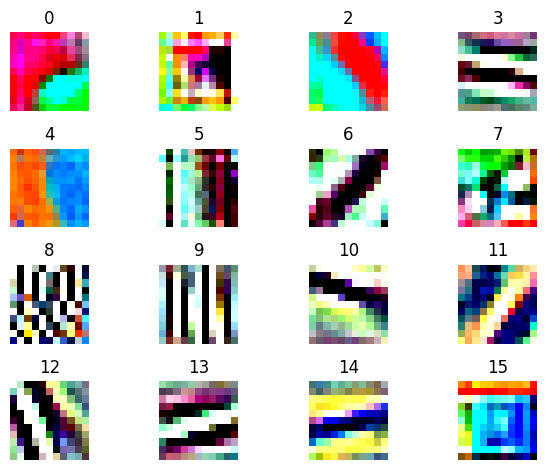

In [5]:
conv_layer = 0
fetch_filters(pret_mod, filt_idx, layer = conv_layer)